In [14]:
from main_sparch_good import RC, load_shd_or_ssc, multiple_trial
import torch
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [2]:
def load_random_data(N=10000, T=200, dim=700, device='cpu'):
    data,, = torch.randint(0, 2, size=(N, T, dim)).to(device)
    return data
random_data = load_random_data()


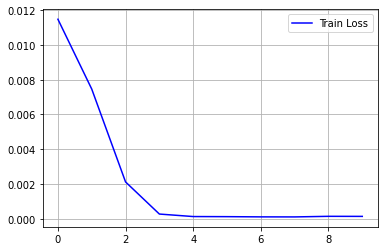

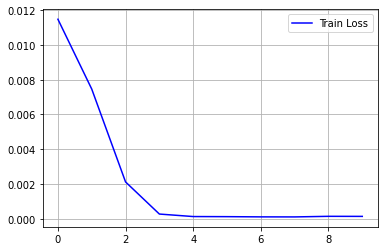

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

model = RC().to('cuda:0')
batch = 200
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01, weight_decay=1e-4)

losses = []
for e in range(10):
    epoch_loss = 0
    for i in range(10000//batch):
        outputs, firing_rate, all_spikes = model(random_data[i*batch:(i+1)*batch].float().cuda(), mask=0) # all_spikes.shape=(500, 200, 1024)
        freqs = torch.fft.fftfreq(150)[1:75]
        amplitude_spectrum = torch.abs(torch.fft.fft(all_spikes.mean(2)[:,50:]))
        mse_loss = torch.sum(((-0.5*freqs.log().cuda()-4.5).exp() - amplitude_spectrum.mean(0)[1:75])**2)
        
        optimizer.zero_grad()
        mse_loss.backward()
        optimizer.step()
        epoch_loss += mse_loss.item()
    print(e, epoch_loss/50)
    losses.append(epoch_loss/50)
    ax.cla(); ax.grid()
    ax.plot(losses, 'b-', label='Train Loss')
    ax.legend(loc='upper right')
    display.clear_output(wait=True)
    display.display(fig)
# plt.plot(all_spikes[0].mean(1).detach().cpu().numpy())

In [21]:
random_data = load_random_data(N=500)
outputs, firing_rate, all_spikes = model(random_data.float().cuda(), mask=0) # all_spikes.shape=(500, 200, 1024)
freqs = torch.fft.fftfreq(150)[1:75]
amplitude_spectrum = torch.abs(torch.fft.fft(all_spikes.mean(2)[:,50:]))

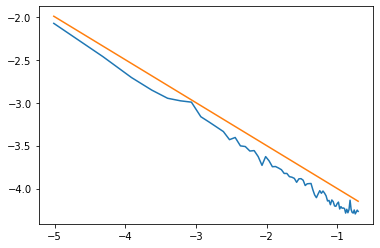

In [23]:
plt.plot(freqs.cpu().log().numpy(), amplitude_spectrum.detach().cpu().log().mean(0).numpy()[1:75])
plt.plot(freqs.cpu().log().numpy(), -0.5*freqs.cpu().log().numpy()-4.5)

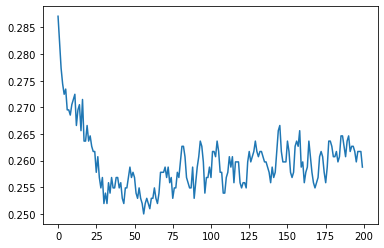

In [92]:
plt.plot(all_spikes[167].mean(1).detach().cpu().numpy())

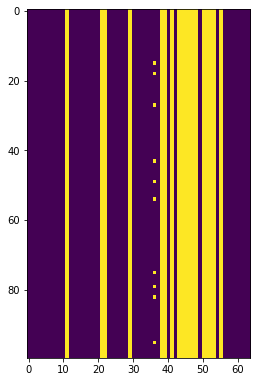

In [87]:
plt.figure(figsize=(4,20))
plt.imshow(all_spikes[167,50:150,0:64].detach().cpu().numpy())
# plt.colorbar()


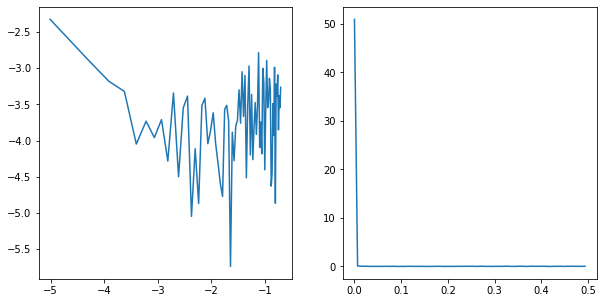

In [14]:
# x = all_spikes.mean(0).mean(1)
# x = all_spikes[:,:,20].mean(0)
x = all_spikes[102].mean(1)[50:]
# plt.plot(x.detach().cpu().numpy())
freqs = torch.fft.fftfreq(len(x))[:75]
fft_result = torch.fft.fft(x)
amplitude_spectrum = torch.abs(fft_result)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(freqs.detach().cpu().log().numpy()[:75], amplitude_spectrum.detach().cpu().log().numpy()[:75])
plt.subplot(122)
plt.plot(freqs.detach().cpu().numpy()[:75], amplitude_spectrum.detach().cpu().numpy()[:75])

In [17]:
# all_spikes.mean(2)[:,50:]
# fft_result = torch.fft.fft(all_spikes.mean(2)[:,50:])
amplitude_spectrum[1:75].log()

tensor([ 3.9308, -2.3248, -2.8716, -3.1816, -3.3200, -4.0478, -3.7319, -3.9582,
        -3.7104, -4.2834, -3.3421, -4.4997, -3.5502, -3.3852, -5.0467, -4.1121,
        -4.8699, -3.5146, -3.4144, -4.0429, -3.8601, -3.6154, -4.0482, -4.3200,
        -4.5937, -4.7727, -3.5684, -3.5127, -3.7215, -5.7388, -3.8842, -4.2780,
        -3.7981, -3.7220, -3.2986, -3.7598, -3.0486, -3.6664, -3.0991, -4.5136,
        -3.5147, -2.9691, -4.1986, -3.3625, -4.2635, -3.8085, -3.4751, -3.9145,
        -3.5207, -2.7855, -4.0948, -3.7417, -4.1829, -3.0014, -3.1937, -4.4030,
        -3.5386, -2.8906, -3.5464, -3.4628, -3.1407, -3.2879, -4.6287, -4.4598,
        -3.4898, -3.9302, -2.9867, -4.8652, -3.2192, -3.3832, -3.0928, -3.8524,
        -3.3796, -3.5471, -3.2636], device='cuda:0', grad_fn=<LogBackward0>)

In [10]:
torch.fft.fftfreq(150)[1:75].log()

tensor([   -inf, -5.0106, -4.3175, -3.9120, -3.6243, -3.4012, -3.2189, -3.0647,
        -2.9312, -2.8134, -2.7081, -2.6127, -2.5257, -2.4457, -2.3716, -2.3026,
        -2.2380, -2.1774, -2.1203, -2.0662, -2.0149, -1.9661, -1.9196, -1.8751,
        -1.8326, -1.7918, -1.7525, -1.7148, -1.6784, -1.6433, -1.6094, -1.5766,
        -1.5449, -1.5141, -1.4843, -1.4553, -1.4271, -1.3997, -1.3730, -1.3471,
        -1.3218, -1.2971, -1.2730, -1.2494, -1.2264, -1.2040, -1.1820, -1.1605,
        -1.1394, -1.1188, -1.0986, -1.0788, -1.0594, -1.0403, -1.0217, -1.0033,
        -0.9853, -0.9676, -0.9502, -0.9331, -0.9163, -0.8998, -0.8835, -0.8675,
        -0.8518, -0.8362, -0.8210, -0.8059, -0.7911, -0.7765, -0.7621, -0.7480,
        -0.7340, -0.7202, -0.7066])

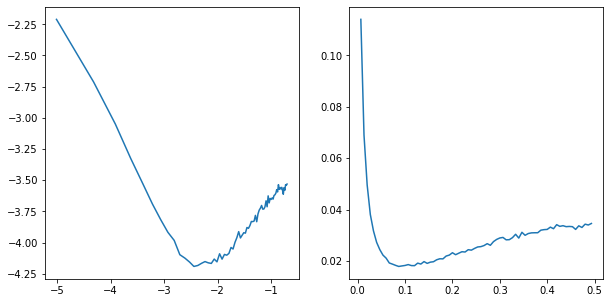

In [36]:
# x = all_spikes.mean(0).mean(1)
# x = all_spikes[:,:,20].mean(0)
# x = all_spikes[102].mean(1)[50:]
# plt.plot(x.detach().cpu().numpy())
freqs = torch.fft.fftfreq(150)[1:75]
amplitude_spectrum = torch.abs(torch.fft.fft(all_spikes.mean(2)[:,50:]))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(freqs.detach().cpu().log().numpy(), amplitude_spectrum.detach().cpu().log().mean(0).numpy()[1:75])
plt.subplot(122)
plt.plot(freqs.detach().cpu().numpy(), amplitude_spectrum.detach().cpu().mean(0).numpy()[1:75])

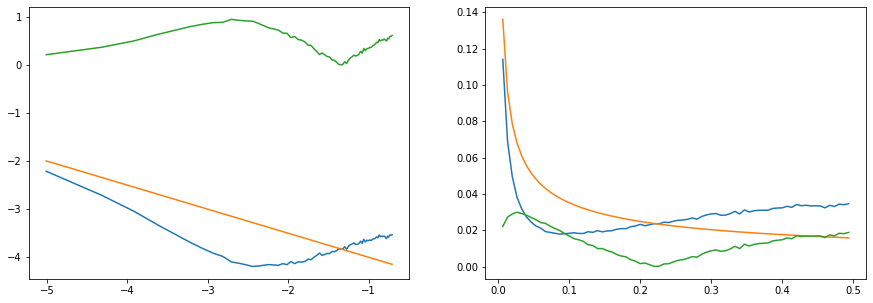

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(freqs.cpu().log().numpy()[1:75], amplitude_spectrum.detach().cpu().log().mean(0).numpy()[1:75])
plt.plot(freqs.cpu().log().numpy()[1:75], -0.5*freqs.cpu().log().numpy()[1:75]-4.5)
plt.plot(freqs.cpu().log().numpy()[1:75], abs(-0.5*freqs.cpu().log().numpy()[1:75]-4.5-amplitude_spectrum.detach().cpu().log().mean(0).numpy()[1:75]))
plt.subplot(122)
plt.plot(freqs.cpu().numpy()[1:75], amplitude_spectrum.detach().cpu().mean(0).numpy()[1:75])# 
plt.plot(freqs.cpu().numpy()[1:75], np.exp(-0.5*freqs.cpu().log().numpy()[1:75]-4.5)) # np.exp(np.linspace(-5, -1, 75)), 
# plt.subplot(133)
plt.plot(freqs.cpu().numpy()[1:75], abs(np.exp(-0.5*freqs.cpu().log().numpy()[1:75]-4.5)-amplitude_spectrum.detach().cpu().mean(0).numpy()[1:75]))


In [150]:
np.arange(-5, )


array([], dtype=int32)

In [101]:
import torch
import torch.nn.functional as F

def generate_brownian_noise(length, num_channels, scale=0.01):
    noise = torch.randn(num_channels, length)
    noise = F.conv1d(noise.view(num_channels, 1, -1), torch.ones(num_channels, 1, 2), padding=1).view(num_channels, -1)
    noise *= scale
    return noise

# 批量生成20个长度为100的700维棕色噪音序列
batch_size = 20
sequence_length = 100
num_channels = 700

noises = []
for _ in range(batch_size):
    noise = generate_brownian_noise(sequence_length, num_channels)
    noises.append(noise)

# noises = torch.stack(noises)

In [103]:
noises = torch.stack(noises)
noises.shape

torch.Size([20, 700, 70700])

In [50]:
[np.exp(-1/5), np.exp(-1/25)]

[0.8187307530779818, 0.9607894391523232]

tensor(0)


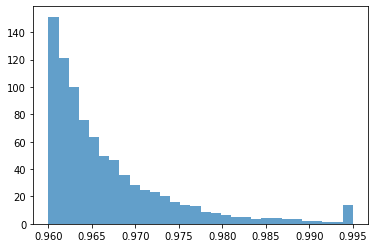

In [68]:
import torch
import torch.distributions as dist
scale = 1.0; alpha = 6
pareto = dist.Pareto(scale, alpha)
a = torch.rand(20,400)
samples = torch.clamp(pareto.sample(a.shape) - 1, min=0, max=1.0) * (0.995-0.96) + 0.96
print((samples<0).sum())
results = plt.hist(samples.view(-1).numpy(), bins=30, density=True, alpha=0.7)

In [69]:
[np.exp(-1 / 5), np.exp(-1 / 25)]

[0.8187307530779818, 0.9607894391523232]

IndexError: index 2 is out of bounds for axis 1 with size 2

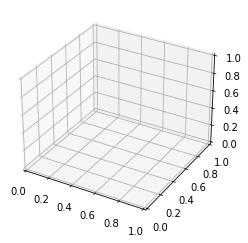

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def levy_flight(n_steps, step_size, dim=2):
    position = np.zeros(dim)
    trajectory = [position.copy()]  # 存储轨迹点的列表
    for _ in range(n_steps):
        direction = np.random.randn(dim)  
        distance = np.random.exponential(scale=step_size) 

        position += direction * distance
        trajectory.append(position.copy())  # 添加新的位置到轨迹
        
    return np.array(trajectory)

n_steps = 100000
step_size = 1.0

# 进行Levy飞行模拟
trajectory = levy_flight(n_steps, step_size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = trajectory[:, 0]
y = trajectory[:, 1]
z = trajectory[:, 2]

# 绘制轨迹
ax.plot(x, y, z, linewidth=0.5)

plt.title("Lévy Flight Trajectory")
plt.show()
plt.plot(x,y)

In [49]:
from main_sparch_better import *
train_loader, test_loader = load_shd_or_ssc()

dataset shape:  (8156, 100, 700)
dataset shape:  (2264, 100, 700)


In [62]:
set_seed(100)
model = torch.load(r'log\08-22-02-36\ckpt\best_model_87_93.7279151943463.pth').to('cuda')
def tests(model:RC, dataloader, mask, criterion):
    model.eval()
    with torch.no_grad():
        model.alpha.data += 0.01*torch.rand(1024).cuda() # *(np.exp(-1 / 25) - np.exp(-1 / 5)) + np.exp(-1 / 5)
        losses, correct, total = [], 0, 0
        for images, labels in dataloader:
            images = torch.sign(images.clamp(min=0)) # all pixels should be 0 or 1
            if config.noise_test>0:
                images += torch.rand_like(images) * config.noise_test
            outputs, firing_rates, all_spikes = model(images.to(config.device), mask)
            loss_val = criterion(outputs, labels.long().to(config.device))
            losses.append(loss_val.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels.long().cpu()).sum()
        accuracy = 100. * correct.numpy() / total
        loss = np.mean(losses)
    return accuracy, loss

In [63]:
criterion = nn.CrossEntropyLoss()
for i in range(10):
    # set_seed(1692623414)
    accuracy, loss = tests(model, test_loader, 0, criterion)
    print(accuracy)

92.93286219081273
92.93286219081273
92.8886925795053
92.75618374558304
92.4469964664311
91.8286219081272
91.7844522968198
90.68021201413427
89.35512367491167
87.89752650176679


In [149]:
A = torch.randn(3)  # 创建一个128维的随机向量
A.requires_grad = True
repeated_A = A.unsqueeze(1).repeat(1, 4).view(-1)
# B = repeated_A.repeat(12 // len(repeated_A))

tensor([1.1912, 1.1912, 1.1912, 1.1912, 0.0698, 0.0698, 0.0698, 0.0698, 1.6026,
        1.6026, 1.6026, 1.6026], grad_fn=<ViewBackward0>)

In [207]:
import cma
import torch
from main_sparch_better import *

model = torch.load(r'log\08-26-02-53\ckpt\best_model_1_92.57950530035336.pth').to('cuda')
train_loader, test_loader = load_shd_or_ssc()

def objective_func(x):
    # alpha = x[0: 128]
    # beta = x[128: 128*2]
    # a = x[0: 128]
    # b = x[128: 128*2]
    model.eval()
    with torch.no_grad():
        for i in range(128):
            model.alpha.data[i*8:(i+1)*8] = torch.tensor(x[i]).cuda() # *(np.exp(-1 / 25) - np.exp(-1 / 5)) + np.exp(-1 / 5)
            # model.beta.data[i*8:(i+1)*8] = torch.tensor(best_beta[i]).cuda()
            # model.a.data[i*8:(i+1)*8] = torch.tensor(x[i]).cuda()
            # model.b.data[i*8:(i+1)*8] = torch.tensor(b[i]).cuda()
        losses, correct, total = [], 0, 0
        for images, labels in test_loader:
            images = torch.sign(images.clamp(min=0)) # all pixels should be 0 or 1
            outputs, firing_rates, all_spikes = model(images.to(config.device), 0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels.long().cpu()).sum()
        accuracy = 100. * correct.numpy() / total

    # return 93.7279151943463-accuracy
    return 92.57950530035336 - accuracy

# 定义初始参数和每个参数维度上的步长
x0 = np.random.uniform(np.exp(-1/5), np.exp(-1/25), size=(128))  # 初始参数值
# x0 = np.random.uniform(np.exp(-1/30), np.exp(-1/120), size=(128))  # 初始参数值
# x0 = np.random.uniform(0.45, 0.55, 128) # np.clip(a_centroids, -1, 1)
# x0 = np.concatenate((np.random.uniform(-1, 1, 128), np.random.uniform(0, 2, 128),))
# x0 = np.concatenate((np.random.uniform(np.exp(-1/5), np.exp(-1/25), 128), 
#                 np.random.uniform(np.exp(-1/30), np.exp(-1/120), 128),
#                 np.random.uniform(-1, 1, 128),
#                 np.random.uniform(0, 2, 128),))
sigma0 = 0.005  # 参数步长

# 定义参数的上下界
lower_bounds = [np.exp(-1 / 5)] * 128
upper_bounds = [np.exp(-1 / 25)] * 128
# lower_bounds = [np.exp(-1 / 30)]*128
# upper_bounds = [np.exp(-1 / 120)]*128
# lower_bounds = [-1]*128 # + [0]*128
# upper_bounds = [1]*128 # + [2]*128
# lower_bounds = [np.exp(-1/5)]*128 + [np.exp(-1 / 30)]*128 + [-1]*128 + [0]*128  # 参数的下界
# upper_bounds = [np.exp(-1/25)]*128 + [np.exp(-1 / 120)]*128 + [1]*128 + [2]*128  # 参数的上界
bounds = [lower_bounds, upper_bounds]

# 创建CMAES对象并运行优化
es = cma.CMAEvolutionStrategy(x0, sigma0, {'bounds': bounds,
                                           'popsize': 50,
                                           'maxiter': 2000,
                                          #  'verbose': True,
                                           'verb_disp': 1,
                                           'verb_filenameprefix': 'outcmaes/',
                                           'tolfun': 1e-11, 
                                           'tolstagnation': 50,
                                        #    'resume': 'outcmaes/'
                                           })
es.optimize(objective_func)

# 输出最佳解和对应的目标函数值
best_solution = es.result.xbest
best_fitness = es.result.fbest
print("Best solution found: ", best_solution)
print("Best fitness value: ", best_fitness)

dataset shape:  (8156, 100, 700)
dataset shape:  (2264, 100, 700)
(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 128 (seed=193405, Sat Aug 26 17:24:11 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     50 6.325088339222616e+01 1.0e+00 4.75e-03  5e-03  5e-03 1:08.1
    2    100 6.294169611307421e+01 1.0e+00 4.62e-03  5e-03  5e-03 2:17.5
    3    150 6.276501766784453e+01 1.0e+00 4.56e-03  5e-03  5e-03 3:25.7
    4    200 6.236749116607774e+01 1.0e+00 4.58e-03  5e-03  5e-03 4:37.3
    5    250 6.188162544169612e+01 1.0e+00 4.63e-03  5e-03  5e-03 5:45.9
    6    300 6.166077738515902e+01 1.0e+00 4.72e-03  5e-03  5e-03 6:50.6
    7    350 6.121908127208481e+01 1.0e+00 4.85e-03  5e-03  5e-03 7:58.7
    8    400 6.099823321554771e+01 1.1e+00 5.00e-03  5e-03  5e-03 9:05.9
    9    450 6.090989399293287e+01 1.1e+00 5.17e-03  5e-03  5e-03 10:09.9
   10    500 6.055653710247351e+01 1.1e+00 5.35e-03  5e-03  5e-03 11:14.5
Iterat #Fevals   function value  ax

KeyboardInterrupt: 

In [160]:
best_solution

array([0.97256395, 0.99074706, 0.9672161 , 0.99029245, 0.96814693,
       0.99165949, 0.96955689, 0.96927495, 0.99110786, 0.99165544,
       0.99085009, 0.98046028, 0.99166628, 0.99164499, 0.9916924 ,
       0.99060472, 0.96775346, 0.98845951, 0.9672264 , 0.99145321,
       0.98186853, 0.96738463, 0.98292404, 0.99075785, 0.98798603,
       0.97446569, 0.99167624, 0.98779759, 0.99156251, 0.98920214,
       0.99165829, 0.96939714, 0.96869089, 0.9726575 , 0.96740402,
       0.99031122, 0.99138038, 0.96943011, 0.96833877, 0.9674483 ,
       0.98985584, 0.97008662, 0.98570504, 0.99150564, 0.99169906,
       0.98066576, 0.96752089, 0.96724828, 0.96951252, 0.97217376,
       0.99050927, 0.9678066 , 0.9772856 , 0.98489694, 0.99165317,
       0.99168238, 0.98854559, 0.99113124, 0.99121836, 0.96876005,
       0.99096571, 0.96858371, 0.99165413, 0.96732699, 0.9916783 ,
       0.99168708, 0.98863382, 0.99168978, 0.99170129, 0.98845998,
       0.9897373 , 0.99169406, 0.9909825 , 0.97718075, 0.96753

In [163]:
np.concatenate((np.random.uniform(np.exp(-1/5), np.exp(-1/25), 128), 
                np.random.uniform(np.exp(-1/30), np.exp(-1/120), 128),
                np.random.uniform(-1, 1, 128),
                np.random.uniform(0, 2, 128),)).shape

SyntaxError: invalid syntax (1493901353.py, line 4)

In [196]:
from sklearn.cluster import KMeans
# data = np.random.uniform(-1, 1, 1024)
kmeans = KMeans(n_clusters=128)
kmeans.fit(a.reshape(-1, 1))  # 将数据转换为二维数组形式
a_centroids = kmeans.cluster_centers_.flatten()

kmeans = KMeans(n_clusters=128)
kmeans.fit(b.reshape(-1, 1))  # 将数据转换为二维数组形式
b_centroids = kmeans.cluster_centers_.flatten()

In [203]:
model = torch.load(r'log\08-26-02-53\ckpt\best_model_1_92.57950530035336.pth').to('cuda')
a = model.a.cpu().detach().numpy()
b = model.b.cpu().detach().numpy()

In [205]:
a, b

(array([0.6348588], dtype=float32), array([1.4394513], dtype=float32))

In [199]:
np.clip(a_centroids, -1, 1)

array([-0.63407147,  0.45662293, -0.12368052,  0.8351501 ,  0.16965613,
       -0.36738187, -0.85232043,  0.65789896,  1.        ,  0.35170624,
        0.068883  , -0.462285  , -0.31138662, -1.        , -0.7443964 ,
        0.5655939 , -0.22702661, -0.55250776,  0.26138726, -0.02899754,
        0.9292233 ,  0.7699034 ,  0.14187697,  0.39150414, -0.96425074,
       -0.5153067 ,  0.22031924, -0.677795  , -0.16172057,  0.60304964,
        0.00719235,  0.48577532, -0.785475  , -0.2679816 , -0.3908728 ,
        0.90375996,  0.10973711,  0.30909342,  0.6991857 , -0.06901731,
       -0.4374647 , -0.7063406 , -0.59184843,  0.79898834, -0.20404336,
        1.        ,  0.5235988 , -0.10317521, -0.8226121 ,  0.05711471,
       -1.        , -0.35100287,  0.41165403,  0.5497779 ,  0.27916402,
       -0.87359786,  0.73512447,  0.1955063 ,  0.6368037 ,  0.36422625,
        0.03478327,  0.4401564 ,  0.97855854, -0.25443074, -0.53358704,
       -0.5789497 ,  0.08002546, -0.04275418,  0.24043614,  0.33

Text(0, 0.5, 'beta')

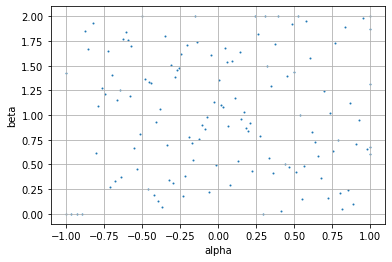

In [200]:
plt.figure(figsize=(6, 4))
plt.scatter(np.clip(a_centroids, -1, 1), np.clip(b_centroids, 0, 2), s=1); plt.grid()
plt.xlabel('alpha')
plt.ylabel('beta')